In [1]:
from pathlib import Path

import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

DATA_PATH = Path("../../data")

### Load packages

In [2]:
rng = np.random.default_rng(seed=12)
az.style.use("arviz-white")

### Load data

In [3]:
nes = pd.read_csv(DATA_PATH / "nes.txt", delimiter=" ")
nes.head()

,year,resid,weight1,weight2,weight3,age,gender,race,educ1,urban,...,parent_party,white,year_new,income_new,age_new,vote.1,age_discrete,race_adj,dvote,rvote
536,1952,1,1.0,1.0,1.0,25,2,1,2,2.0,...,2.0,1,1,1,-2.052455,1.0,1,1.0,0.0,1.0
537,1952,2,1.0,1.0,1.0,33,2,1,1,2.0,...,0.0,1,1,1,-1.252455,1.0,2,1.0,1.0,0.0
538,1952,3,1.0,1.0,1.0,26,2,1,2,2.0,...,-2.0,1,1,0,-1.952455,1.0,1,1.0,0.0,1.0
539,1952,4,1.0,1.0,1.0,63,1,1,2,2.0,...,NaN,1,1,0,1.747545,1.0,3,1.0,0.0,1.0
540,1952,5,1.0,1.0,1.0,66,2,1,2,2.0,...,-2.0,1,1,-2,2.047545,1.0,4,1.0,0.0,1.0


### Partyid model to illustrate repeated model use (secret weapon)

In [4]:
def regress_year(year, data=nes):
    this_year = data[data["year"] == year]
    model = bmb.Model(
        "partyid7 ~ real_ideo + race_adj + C(age_discrete) + educ1 + female + income",
        data=this_year,
        dropna=True,
    )
    idata = model.fit()
    stats = az.summary(idata, kind="stats")
    return (year, stats)


years = np.arange(1972, 2004, 4)
summary = [regress_year(year) for year in years]

Automatically removing 838/2168 rows from the dataset.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [partyid7_sigma, Intercept, income, female, educ1, C(age_discrete), race_adj, real_ideo]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.
Automatically removing 469/1653 rows from the dataset.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [partyid7_sigma, Intercept, income, female, educ1, C(age_discrete), race_adj, real_ideo]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Automatically removing 364/1065 rows from the dataset.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [partyid7_sigma, Intercept, income, female, educ1, C(age_discrete), race_adj, real_ideo]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Automatically removing 434/1660 rows from the dataset.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [partyid7_sigma, Intercept, income, female, educ1, C(age_discrete), race_adj, real_ideo]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.
Automatically removing 380/1493 rows from the dataset.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [partyid7_sigma, Intercept, income, female, educ1, C(age_discrete), race_adj, real_ideo]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Automatically removing 374/1724 rows from the dataset.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [partyid7_sigma, Intercept, income, female, educ1, C(age_discrete), race_adj, real_ideo]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
Automatically removing 241/1284 rows from the dataset.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [partyid7_sigma, Intercept, income, female, educ1, C(age_discrete), race_adj, real_ideo]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.
Automatically removing 708/1184 rows from the dataset.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [partyid7_sigma, Intercept, income, female, educ1, C(age_discrete), race_adj, real_ideo]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 493 seconds.


### plot

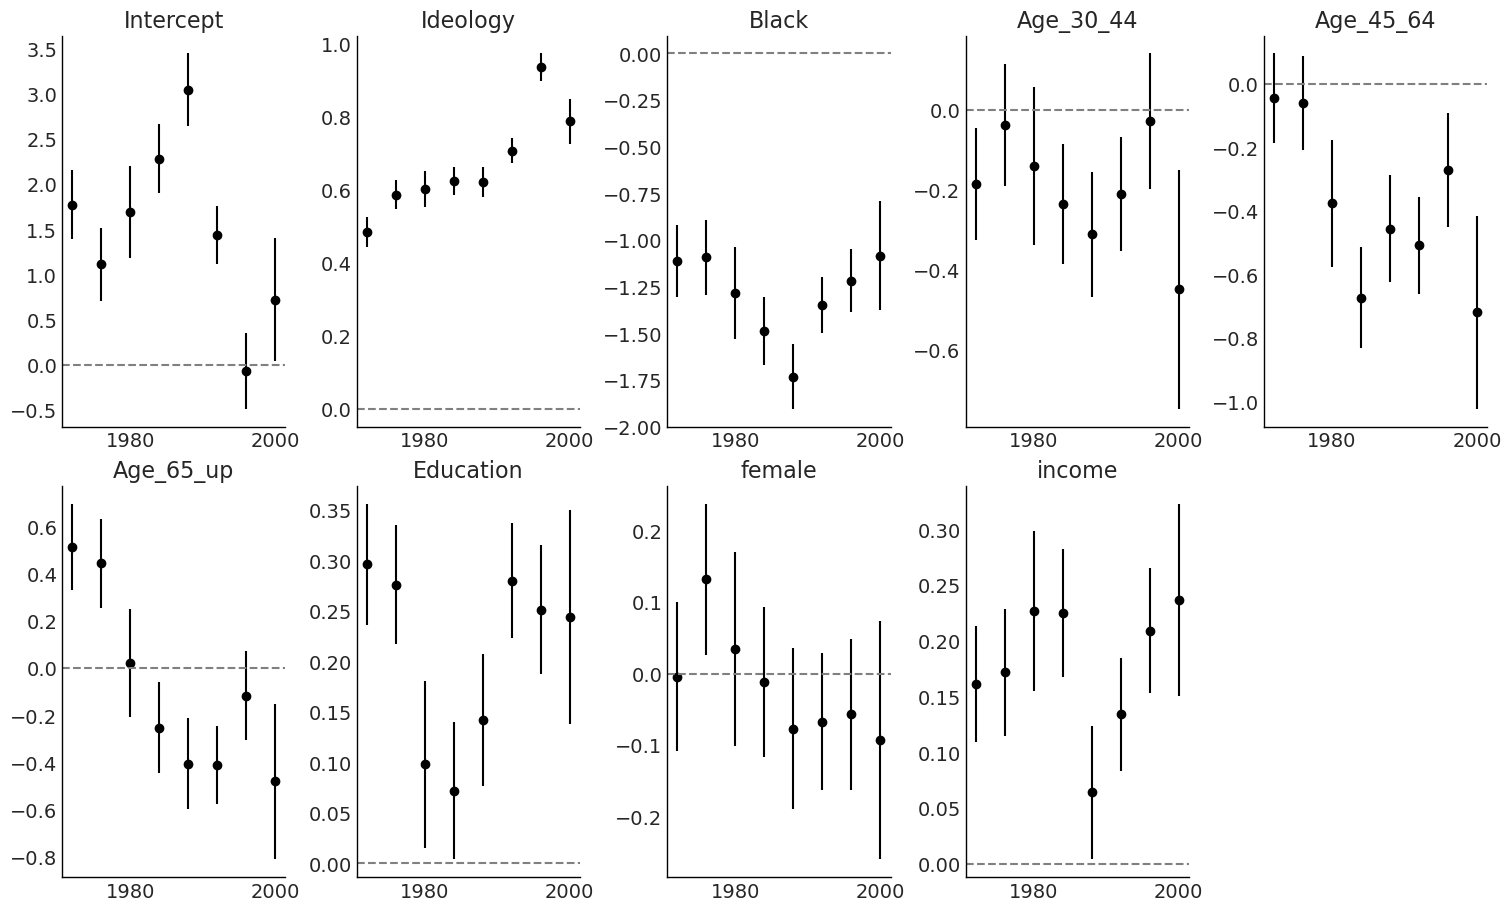

In [11]:
coefs = [
    "Intercept",
    "real_ideo",
    "race_adj",
    "C(age_discrete)[2]",
    "C(age_discrete)[3]",
    "C(age_discrete)[4]",
    "educ1",
    "female",
    "income",
]

coef_names = [
    "Intercept",
    "Ideology",
    "Black",
    "Age_30_44",
    "Age_45_64",
    "Age_65_up",
    "Education",
    "female",
    "income",
]

fig, axes = plt.subplots(2, 5, figsize=(15, 9))

for ax, coef in zip(axes.flat, coefs):
    coef_each_year = [summary[i][1].loc[coef, "mean"] for i in range(len(summary))]
    coef_sd_each_year = [summary[i][1].loc[coef, "sd"] for i in range(len(summary))]
    ax.scatter(years, coef_each_year, color="black")
    ax.errorbar(
        years, coef_each_year, yerr=coef_sd_each_year, fmt="none", color="black"
    )
    ax.axhline(0, linestyle="--", color="gray")
    ax.set_title(coef_names[coefs.index(coef)])

axes.flat[-1].remove()